<a href="https://colab.research.google.com/github/BillyTevin11/Coding-Projects/blob/main/LULC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
import geemap
# Initialize Earth Engine
ee.Authenticate()

ee.Initialize(project='ee-vindevon11')

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [2]:
# Load the FAO Dataset
roi = ee.FeatureCollection('FAO/GAUL_SIMPLIFIED_500m/2015/level2') \
  .filter(ee.Filter.eq('ADM0_NAME', 'Kenya')).filter(ee.Filter.eq('ADM2_NAME', 'Nakuru'))

# Map the boundary
Map = geemap.Map()
Map.centerObject(roi, 11)
Map.addLayer(roi, {}, 'County Boundary')

In [7]:
landcover = ee.Image('MODIS/051/MCD12Q1/2013_01_01')\
          .select('Land_Cover_Type_1').clip(roi)

Map.centerObject(roi,9)
Map.addLayer(landcover, {}, 'MODIS Land Cover')
Map.add_legend(builtin_legend='MODIS/051/MCD12Q1')
Map

Map(bottom=263115.0, center=[-0.4609796127738904, 36.07996412247713], controls=(WidgetControl(options=['positi…

In [4]:
# Define the legend keys and their corresponding land cover categories
legend_keys = {
    1: 'Evergreen Needleleaf Forests',
    2: 'Evergreen Broadleaf Forests',
    3: 'Deciduous Needleleaf Forests',
    4: 'Deciduous Broadleaf Forests',
    5: 'Mixed Forests',
    6: 'Closed Shrublands',
    7: 'Open Shrublands',
    8: 'Woody Savannas',
    9: 'Savannas',
    10: 'Grasslands',
    11: 'Permanent Wetlands',
    12: 'Croplands',
    13: 'Urban and Built-up',
    14: 'Cropland/Natural Vegetation Mosaic',
    15: 'Snow and Ice',
    16: 'Barren or Sparsely Vegetated',
    17: 'Water Bodies'
}

# Function to calculate area for each land cover class
def calculate_area(image, roi, legend_keys):
    area_dict = {}
    for key, value in legend_keys.items():
        areaImage = image.eq(key).multiply(ee.Image.pixelArea())
        # Pass reducer directly and other parameters as separate arguments
        area = areaImage.reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=roi,
            scale=30,
            maxPixels=1e13
        ).get('Land_Cover_Type_1')
        area_dict[value] = area

    return area_dict

# Calculate the area for each land cover category
area_hectares = calculate_area(landcover, roi.geometry(), legend_keys)

# Print the area for each category in hectares
for category, area in area_hectares.items():
    print(f'{category}: {area.getInfo() / 10000} hectares')

Evergreen Needleleaf Forests: 84.6699144104004 hectares
Evergreen Broadleaf Forests: 34930.54843686809 hectares
Deciduous Needleleaf Forests: 0.0 hectares
Deciduous Broadleaf Forests: 295.76242486572266 hectares
Mixed Forests: 3477.6700353398824 hectares
Closed Shrublands: 414.47958610229495 hectares
Open Shrublands: 658.9034102844238 hectares
Woody Savannas: 138555.1467526764 hectares
Savannas: 44393.87333878628 hectares
Grasslands: 200224.94362540205 hectares
Permanent Wetlands: 6021.872212347412 hectares
Croplands: 22459.02221276326 hectares
Urban and Built-up: 3378.8217029052735 hectares
Cropland/Natural Vegetation Mosaic: 277032.2158674952 hectares
Snow and Ice: 20.159500122070312 hectares
Barren or Sparsely Vegetated: 810.9495553222656 hectares
Water Bodies: 0.0 hectares


In [5]:
import pandas as pd

# Create a list of tuples containing category and area
area_list = [(category, area.getInfo() / 10000) for category, area in area_hectares.items()]

# Create a Pandas DataFrame from the list
df = pd.DataFrame(area_list, columns=['Category', 'Area (hectares)'])

# Sort the DataFrame in descending order of area
df = df.sort_values('Area (hectares)', ascending=False)

# Print the DataFrame
df.head(5)

,Category,Area (hectares)
13,Cropland/Natural Vegetation Mosaic,277032.215867
9,Grasslands,200224.943625
7,Woody Savannas,138555.146753
8,Savannas,44393.873339
1,Evergreen Broadleaf Forests,34930.548437


In [8]:
import matplotlib.pyplot as plt

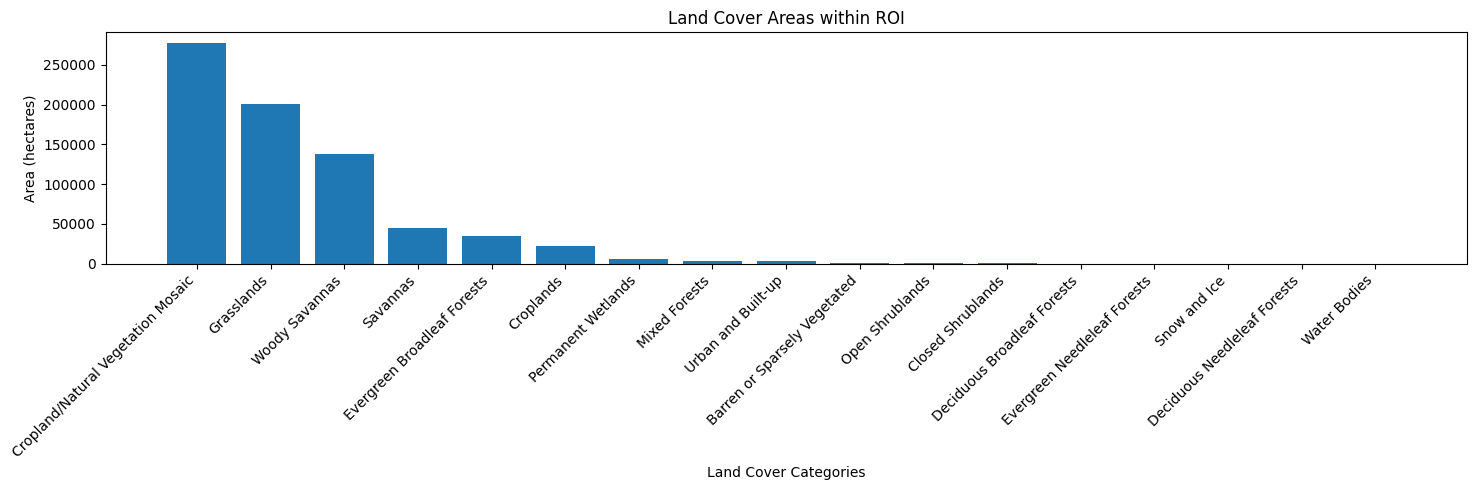

In [9]:
# Extract categories and areas for plotting
categories = df['Category'].tolist()
areas = df['Area (hectares)'].tolist()

# Create the column chart
plt.figure(figsize=(15, 5))
plt.bar(categories, areas)
plt.xlabel('Land Cover Categories')
plt.ylabel('Area (hectares)')
plt.title('Land Cover Areas within ROI')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

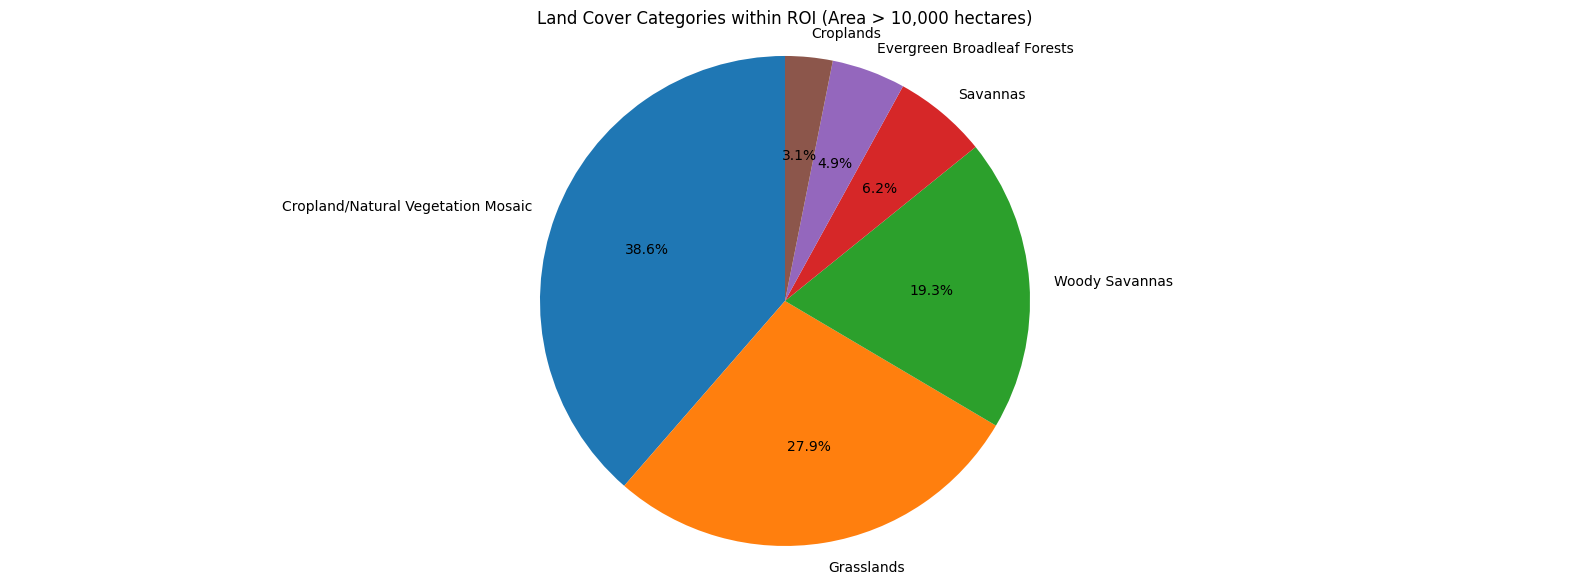

In [11]:

# Filter out categories with area less than or equal to 0
df_filtered = df[df['Area (hectares)'] > 10000]

# Extract categories and areas for plotting
categories = df_filtered['Category'].tolist()
areas = df_filtered['Area (hectares)'].tolist()

# Create the pie chart
plt.figure(figsize=(20, 7))
plt.pie(areas, labels=categories, autopct='%1.1f%%', startangle=90)
plt.title('Land Cover Categories within ROI (Area > 10,000 hectares)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()